In [1]:
import requests
import random
import pandas as pd
import json
from api_keys import weather_api_key
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams

%load_ext lab_black

In [2]:
path = os.path.join(
    "..",
    "..",
    "UTA-AUS-DATA-PT-07-2020-U-C",
    "homework",
    "06-Python-APIs",
    "Instructions",
    "output_data",
    "cities.csv",
)

In [3]:
cities_data = pd.read_csv(path)

In [4]:
cities_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [5]:
cities_data.dtypes

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

# Cities List

In [6]:
cities_list = cities_data["City"].to_list()
cities_list

['ostrovnoy',
 'mahebourg',
 'qaanaaq',
 'zhuhai',
 'cape town',
 'atuona',
 'flinders',
 'opuwo',
 'tiksi',
 'pushkinskiye gory',
 'aykhal',
 'castro',
 'avarua',
 'saskylakh',
 'constitucion',
 'albany',
 'vilyuysk',
 'ushuaia',
 'bambous virieux',
 'kodinsk',
 'teknaf',
 'busselton',
 'ambon',
 'maragogi',
 'fallon',
 'kantang',
 'colonelganj',
 'punta arenas',
 'rikitea',
 'new norfolk',
 'gobabis',
 'qingdao',
 'port hardy',
 'arman',
 'mamakan',
 'bethel',
 'clinton',
 'varhaug',
 'ayan',
 'mayor pablo lagerenza',
 'hermanus',
 'torbay',
 'yellowknife',
 'kruisfontein',
 'puerto ayora',
 'rosita',
 'beloha',
 'port elizabeth',
 'port alfred',
 'garchitorena',
 'kodiak',
 'mar del plata',
 'taybad',
 'cabo san lucas',
 'tiarei',
 'khatanga',
 'pisco',
 'kolyvan',
 'hofn',
 'bontang',
 'sault sainte marie',
 'zhigansk',
 'thompson',
 'pevek',
 'nanortalik',
 'bilibino',
 'dikson',
 'hambantota',
 'beja',
 'fortuna',
 'ponta do sol',
 'qasigiannguit',
 'butaritari',
 'virginia beach

In [7]:
def extract_data(data):
    return {
        "name": data["name"],
        "lat": data["coord"]["lat"],
        "lon": data["coord"]["lon"],
        "Temperature (F)": data["main"]["temp"],
        "Humidity_%": data["main"]["humidity"],
        "Cloudiness_%": data["clouds"]["all"],
        "Wind Speed_mph": data["wind"]["speed"],
    }

In [8]:
cities_results = []

In [9]:
for city in cities_list:
    data = requests.get(
        "http://api.openweathermap.org/data/2.5/weather",
        params={"q": city, "appid": weather_api_key, "units": "imperial"},
    ).json()
    city_result = extract_data(data)
    cities_results.append(city_result)
cities_results

[{'name': 'Ostrovnoy',
  'lat': 68.05,
  'lon': 39.51,
  'Temperature (F)': 42.19,
  'Humidity_%': 91,
  'Cloudiness_%': 100,
  'Wind Speed_mph': 15.55},
 {'name': 'Mahébourg',
  'lat': -20.41,
  'lon': 57.7,
  'Temperature (F)': 68,
  'Humidity_%': 82,
  'Cloudiness_%': 40,
  'Wind Speed_mph': 4.7},
 {'name': 'Qaanaaq',
  'lat': 77.48,
  'lon': -69.36,
  'Temperature (F)': 13.15,
  'Humidity_%': 76,
  'Cloudiness_%': 66,
  'Wind Speed_mph': 5.95},
 {'name': 'Zhuhai',
  'lat': 22.28,
  'lon': 113.57,
  'Temperature (F)': 80.71,
  'Humidity_%': 83,
  'Cloudiness_%': 20,
  'Wind Speed_mph': 13.87},
 {'name': 'Cape Town',
  'lat': -33.93,
  'lon': 18.42,
  'Temperature (F)': 47.84,
  'Humidity_%': 87,
  'Cloudiness_%': 75,
  'Wind Speed_mph': 10.29},
 {'name': 'Atuona',
  'lat': -9.8,
  'lon': -139.03,
  'Temperature (F)': 78.37,
  'Humidity_%': 74,
  'Cloudiness_%': 0,
  'Wind Speed_mph': 14.41},
 {'name': 'Flinders',
  'lat': -34.58,
  'lon': 150.86,
  'Temperature (F)': 59,
  'Humidity

# Convert Raw Data to DataFrame

In [10]:
cities_df = pd.DataFrame(cities_results)
cities_df

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
0,Ostrovnoy,68.05,39.51,42.19,91,100,15.55
1,Mahébourg,-20.41,57.70,68.00,82,40,4.70
2,Qaanaaq,77.48,-69.36,13.15,76,66,5.95
3,Zhuhai,22.28,113.57,80.71,83,20,13.87
4,Cape Town,-33.93,18.42,47.84,87,75,10.29
...,...,...,...,...,...,...,...
543,Yabrūd,33.97,36.66,68.00,72,0,5.82
544,Paraíso,9.84,-83.87,68.20,88,75,4.70
545,Verāval,20.90,70.37,79.32,79,48,9.19
546,Novyy Urgal,51.07,132.56,50.32,84,3,0.38


In [11]:
cities_df.to_csv("cities_df.csv")

### DataFrame Data Analysis

In [12]:
cities_df.describe()

,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,19.486624,22.432281,63.307555,74.125912,50.023723,8.070493
std,33.402215,91.924088,15.979904,18.697452,38.034688,5.317750
min,-54.800000,-175.200000,13.150000,8.000000,0.000000,0.200000
25%,-6.475000,-62.062500,50.000000,65.000000,11.000000,3.927500
50%,20.870000,25.675000,65.310000,78.000000,45.000000,6.930000
75%,47.895000,108.172500,77.000000,87.000000,90.000000,11.410000
max,78.220000,179.320000,97.180000,100.000000,100.000000,31.090000


In [13]:
cities_df.dtypes

name                object
lat                float64
lon                float64
Temperature (F)    float64
Humidity_%           int64
Cloudiness_%         int64
Wind Speed_mph     float64
dtype: object

In [14]:
cities_df.astype({"Humidity_%": "float"}).dtypes

name                object
lat                float64
lon                float64
Temperature (F)    float64
Humidity_%         float64
Cloudiness_%         int64
Wind Speed_mph     float64
dtype: object

In [15]:
cities_df[cities_df["Humidity_%"] > 100]

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph


# Ploting the Data

## Latitude vs. Temperature

In [16]:
cities_lat_temp = cities_df.sort_values("Temperature (F)", ascending=False)[
    ["Temperature (F)", "lat"]
]
cities_lat_temp

,Temperature (F),lat
133,97.18,20.50
260,96.01,36.21
510,95.92,20.52
39,95.92,-19.93
83,94.57,18.90
...,...,...
182,28.40,66.42
136,28.20,63.75
411,26.60,78.22
175,26.60,70.47


### Latitude vs. Temperature Plot

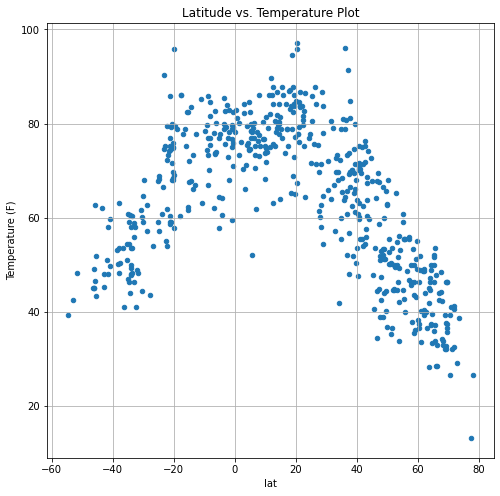

In [17]:
cities_lat_temp.plot(
    kind="scatter",
    x="lat",
    y="Temperature (F)",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Temperature Plot",
)
plt.show()

## Latitude vs. Humidity 

In [18]:
cities_lat_humidity = cities_df.sort_values("Humidity_%", ascending=False)[
    ["Humidity_%", "lat"]
]
cities_lat_humidity

,Humidity_%,lat
168,100,63.87
292,100,12.42
358,100,-13.85
490,100,46.46
51,100,-38.00
...,...,...
227,16,33.60
83,10,18.90
133,9,20.50
260,9,36.21


### Latitude vs. Humidity Plot

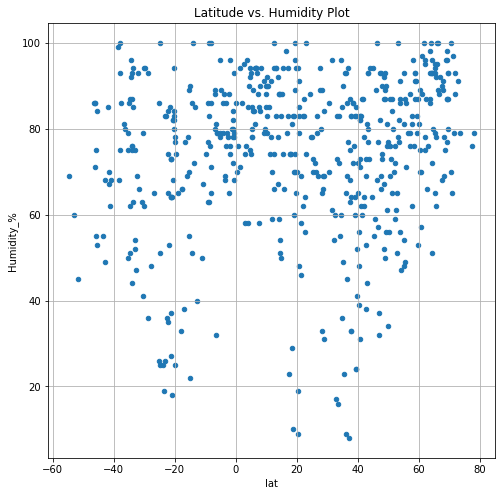

In [19]:
cities_lat_humidity.plot(
    kind="scatter",
    x="lat",
    y="Humidity_%",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Humidity Plot",
)
plt.show()

## Latitude vs. Cloudiness

In [20]:
cities_lat_cloud = cities_df.sort_values("Cloudiness_%", ascending=False)[
    ["Cloudiness_%", "lat"]
]
cities_lat_cloud

,Cloudiness_%,lat
0,100,68.05
58,100,64.25
263,100,48.68
255,100,9.19
254,100,-34.48
...,...,...
365,0,-35.35
367,0,-27.78
459,0,-23.13
458,0,52.06


### Latitude vs. Cloudiness Plot

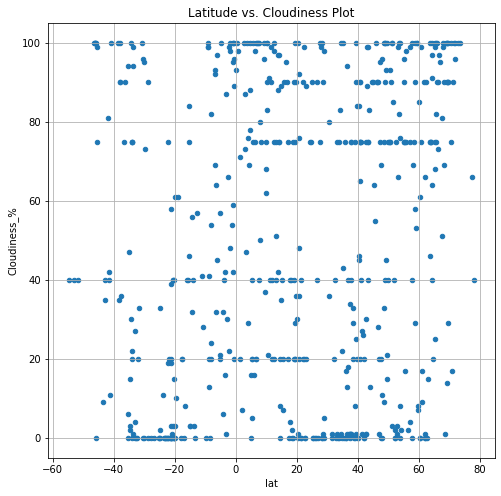

In [21]:
cities_lat_cloud.plot(
    kind="scatter",
    x="lat",
    y="Cloudiness_%",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Cloudiness Plot",
)
plt.show()

## Latitude vs. Wind Speed_mph

In [22]:
cities_lat_wind = cities_df.sort_values("Wind Speed_mph", ascending=False)[
    ["Wind Speed_mph", "lat"]
]
cities_lat_wind

,Wind Speed_mph,lat
438,31.09,-41.41
66,29.04,73.51
17,28.86,-54.80
150,24.61,69.49
466,24.61,69.35
...,...,...
300,0.63,-19.83
494,0.63,7.85
489,0.56,3.08
546,0.38,51.07


### Latitude vs. Wind SPeed Plot

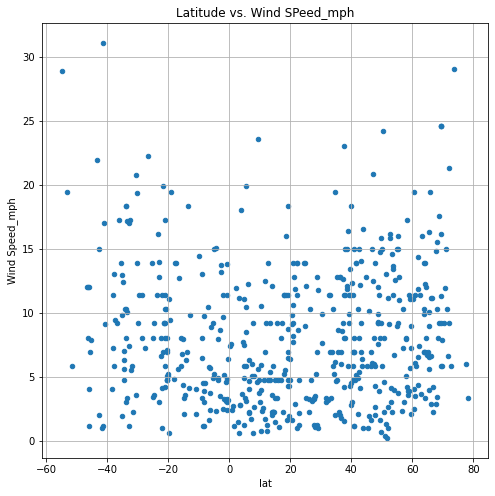

In [23]:
cities_lat_wind.plot(
    kind="scatter",
    x="lat",
    y="Wind Speed_mph",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Wind SPeed_mph",
)
plt.show()

# Linear Regression

## Linear Regression - Northern Hemisphere

In [24]:
cities_northern = cities_df[cities_df["lat"] >= 0]
cities_northern

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
0,Ostrovnoy,68.05,39.51,42.19,91,100,15.55
2,Qaanaaq,77.48,-69.36,13.15,76,66,5.95
3,Zhuhai,22.28,113.57,80.71,83,20,13.87
8,Tiksi,71.69,128.87,41.16,79,100,6.64
9,Pushkinskiye Gory,57.02,28.91,55.98,79,4,7.27
...,...,...,...,...,...,...,...
543,Yabrūd,33.97,36.66,68.00,72,0,5.82
544,Paraíso,9.84,-83.87,68.20,88,75,4.70
545,Verāval,20.90,70.37,79.32,79,48,9.19
546,Novyy Urgal,51.07,132.56,50.32,84,3,0.38


In [25]:
x = cities_northern["lat"].to_frame().values

In [26]:
y = cities_northern["Temperature (F)"].values

In [27]:
model = LinearRegression()

In [28]:
model.fit(x, y)

LinearRegression()

In [29]:
model.intercept_

88.63213347300493

In [30]:
model.coef_[0]

-0.6944904361267308

In [31]:
def predict(x):
    return model.predict([[x]])[0]

In [32]:
x_range = np.arange(
    min(cities_northern["Temperature (F)"]),
    max(cities_northern["Temperature (F)"]),
    0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

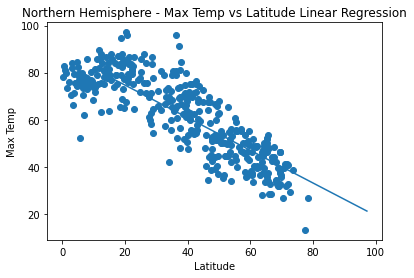

In [33]:
plt.scatter(cities_northern["lat"], cities_northern["Temperature (F)"])
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

## Linear Regression - Southern Hemisphere

In [34]:
cities_southern = cities_df[cities_df["lat"] < 0]
cities_southern

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
1,Mahébourg,-20.41,57.70,68.00,82,40,4.70
4,Cape Town,-33.93,18.42,47.84,87,75,10.29
5,Atuona,-9.80,-139.03,78.37,74,0,14.41
6,Flinders,-34.58,150.86,59.00,51,2,7.00
7,Opuwo,-18.06,13.84,60.39,33,0,4.79
...,...,...,...,...,...,...,...
523,Kununurra,-15.77,128.73,82.40,78,40,5.82
526,Viedma,-40.81,-63.00,59.79,68,100,9.13
536,Padang,-0.95,100.35,75.09,80,100,4.61
539,Palu,-0.89,119.87,76.68,78,100,3.27


In [35]:
x = cities_southern["lat"].to_frame().values

In [36]:
y = cities_southern["Temperature (F)"].values

In [37]:
model = LinearRegression()

In [38]:
model.fit(x, y)

LinearRegression()

In [39]:
model.intercept_

81.1334438005287

In [40]:
model.coef_[0]

0.7134498682116667

In [41]:
def predict(x):
    return model.predict([[x]])[0]

In [42]:
x_range = np.arange(
    min(cities_southern["Temperature (F)"]),
    max(cities_southern["Temperature (F)"]),
    0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

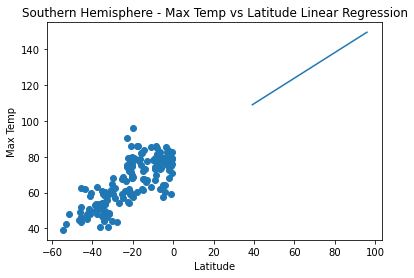

In [43]:
plt.scatter(cities_southern["lat"], cities_southern["Temperature (F)"])
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

In [44]:
x = cities_northern["lat"].to_frame().values

In [45]:
y = cities_northern["Humidity_%"].values

In [46]:
model = LinearRegression()

In [47]:
model.fit(x, y)

LinearRegression()

In [48]:
model.intercept_

73.573216232825

In [49]:
model.coef_[0]

0.052321203212647556

In [50]:
def predict(x):
    return model.predict([[x]])[0]

In [51]:
x_range = np.arange(
    min(cities_northern["Temperature (F)"]),
    max(cities_northern["Temperature (F)"]),
    0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Humidity vs. Latitude Linear Regression

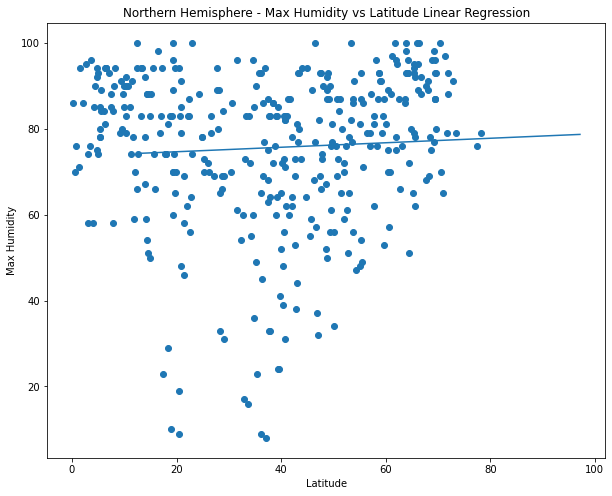

In [52]:
plt.scatter(cities_northern["lat"], cities_northern["Humidity_%"])
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Humidity vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Humidity")
plt.show()

In [53]:
x = cities_southern["lat"].to_frame().values

In [54]:
y = cities_southern["Humidity_%"].values

In [55]:
model = LinearRegression()

In [56]:
model.fit(x, y)

LinearRegression()

In [57]:
model.intercept_

74.53272739107386

In [58]:
model.coef_[0]

0.1656211098198003

In [59]:
def predict(x):
    return model.predict([[x]])[0]

In [60]:
x_range = np.arange(
    min(cities_northern["Humidity_%"]), max(cities_northern["Humidity_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Humidity vs. Latitude Linear Regression

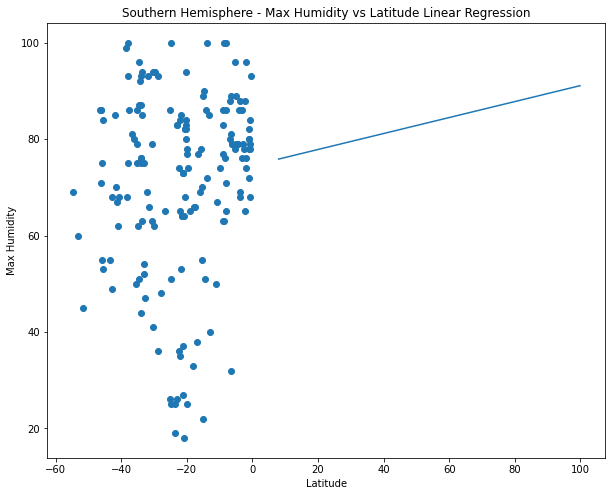

In [61]:
plt.scatter(cities_southern["lat"], cities_southern["Humidity_%"])
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Humidity vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Humidity")
plt.show()

In [62]:
x = cities_northern["lat"].to_frame().values

In [63]:
y = cities_northern["Cloudiness_%"].values

In [64]:
model = LinearRegression()

In [65]:
model.fit(x, y)

LinearRegression()

In [66]:
model.intercept_

47.14758269448696

In [67]:
model.coef_[0]

0.1828414642810025

In [68]:
def predict(x):
    return model.predict([[x]])[0]

In [69]:
x_range = np.arange(
    min(cities_northern["Cloudiness_%"]), max(cities_northern["Cloudiness_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Cloudiness vs. Latitude Linear Regression

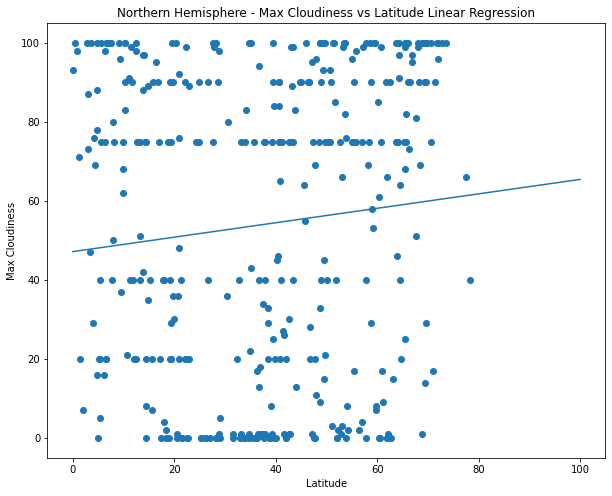

In [70]:
plt.scatter(cities_northern["lat"], cities_northern["Cloudiness_%"])
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Cloudiness vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Cloudiness")
plt.show()

In [71]:
x = cities_southern["lat"].to_frame().values

In [72]:
y = cities_southern["Cloudiness_%"].values

In [73]:
model = LinearRegression()

In [74]:
model.fit(x, y)

LinearRegression()

In [75]:
model.intercept_

41.6696447870825

In [76]:
model.coef_[0]

0.03392756110647249

In [77]:
def predict(x):
    return model.predict([[x]])[0]

In [78]:
x_range = np.arange(
    min(cities_southern["Cloudiness_%"]), max(cities_southern["Cloudiness_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Cloudiness vs. Latitude Linear Regression

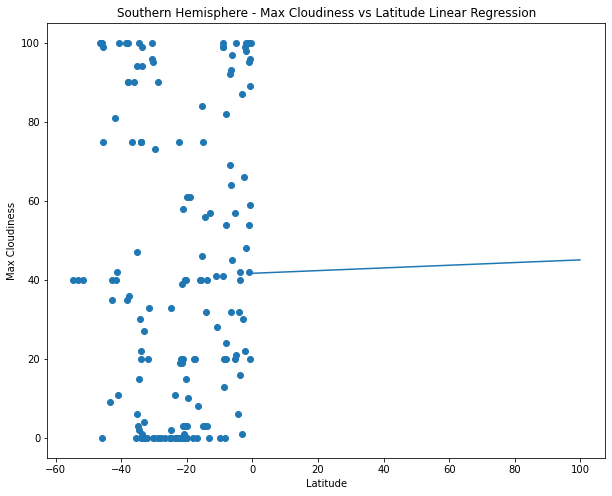

In [79]:
plt.scatter(cities_southern["lat"], cities_southern["Cloudiness_%"])
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Cloudiness vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Cloudiness")
plt.show()

In [80]:
X = cities_northern["lat"].to_frame().values

In [81]:
y = cities_northern["Wind Speed_mph"].values

In [82]:
model = LinearRegression()

In [83]:
model.fit(X, y)

LinearRegression()

In [84]:
model.intercept_

5.340468682941269

In [85]:
model.coef_[0]

0.06657728070470902

In [86]:
def predict(x):
    return model.predict([[x]])[0]

In [87]:
x_range = np.arange(
    min(cities_northern["Cloudiness_%"]), max(cities_northern["Cloudiness_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Wind SPeed mph vs. Latitude Linear Regression

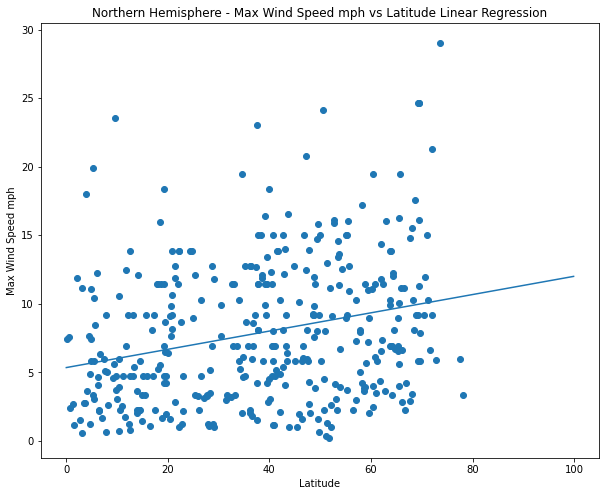

In [88]:
plt.scatter(cities_northern["lat"], cities_northern["Wind Speed_mph"])
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Wind Speed mph vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Wind Speed mph")
plt.show()

In [89]:
X = cities_southern["lat"].to_frame().values

In [90]:
y = cities_southern["Wind Speed_mph"].values

In [91]:
model = LinearRegression()

In [92]:
model.fit(X, y)

LinearRegression()

In [93]:
model.intercept_

5.8884667284600365

In [94]:
model.coef_[0]

-0.1211220256497125

In [95]:
def predict(x):
    return model.predict([[x]])[0]

In [96]:
def predict(x):
    return model.predict([[x]])[0]

In [97]:
x_range = np.arange(
    min(cities_southern["Wind Speed_mph"]), max(cities_southern["Wind Speed_mph"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Wind SPeed mph vs. Latitude Linear Regression

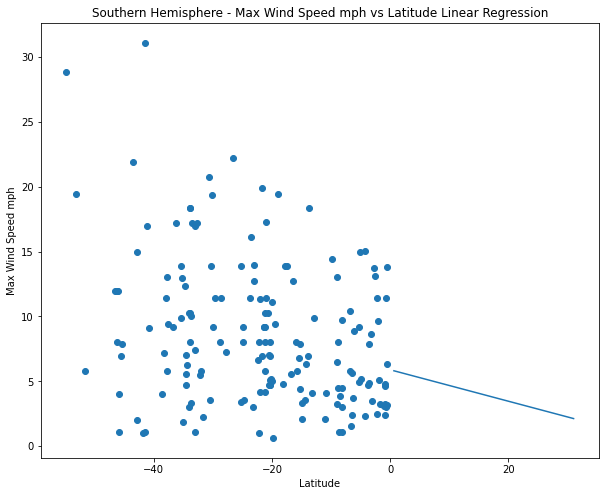

In [98]:
plt.scatter(cities_southern["lat"], cities_southern["Wind Speed_mph"])
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Wind Speed mph vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Wind Speed mph")
plt.show()